# Laboratorio 4: Clasificación de Imágenes con CNN (CIFAR-10)

**Integrantes**
- José Rodrigo Marchena, 22398  
- Sofía Velasquez, 22049  

**Objetivo general**  
Implementar y comparar un modelo base ANN y una CNN para clasificar el dataset CIFAR-10,evaluando desempeño, curvas de aprendizaje y errores comunes. También se incluye un ejercicio opcional de Data Augmentation.

---

## Parte 1: Preparación del Conjunto de Datos

1. Cargamos el dataset CIFAR-10 directamente desde `keras.datasets`.  
   - Son 60,000 imágenes de tamaño 32x32x3 (RGB).  
   - Se dividen en 50,000 de entrenamiento y 10,000 de prueba.  
2. Normalizamos los valores de píxeles, dividiéndolos entre 255, de modo que los valores queden en el rango [0,1]
3. Definimos los nombres de las clases (avión, coche, perro, etc.).  
4. Mostramos 10 imágenes de entrenamiento con sus etiquetas para confirmar que los datos están bien cargados.

Shapes -> x_train: (50000, 32, 32, 3) y_train: (50000,)
Shapes -> x_test: (10000, 32, 32, 3) y_test: (10000,)


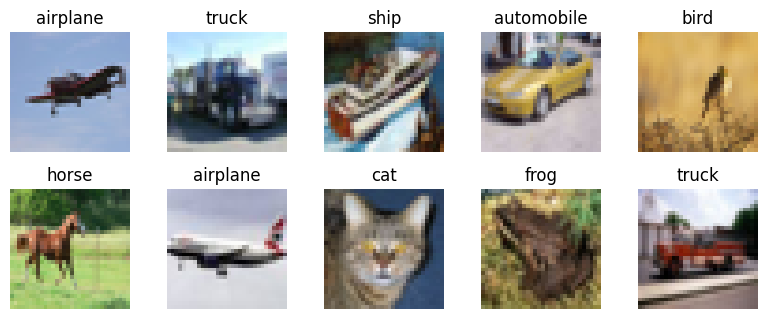

In [12]:
# Carga de CIFAR-10
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = y_train.squeeze()
y_test = y_test.squeeze()

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

print("Shapes -> x_train:", x_train.shape, "y_train:", y_train.shape)
print("Shapes -> x_test:", x_test.shape, "y_test:", y_test.shape)

# Normalización [0,1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Visualización de 10 ejemplos
def show_grid(images, labels, n=10):
    plt.figure(figsize=(8,8))
    idx = np.random.choice(len(images), n, replace=False)
    for i, j in enumerate(idx):
        plt.subplot(5,5,i+1)
        plt.imshow(images[j])
        plt.title(class_names[labels[j]])
        plt.axis("off")
    plt.tight_layout()
    plt.show()

show_grid(x_train, y_train)